# Proyecto Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

En primer lugar, importamos las librerias y definamos el formato para poder leer los datos.

In [3]:
from surprise import Dataset
from surprise import Reader

In [4]:
#Se guardan en la variable reader el parámetro line_format igual a 'user item rating timestamp' y sep como '\t'
reader = Reader(line_format='user item rating timestamp', sep='\t') 

Utilizando este `reader` cargar los datos:

In [5]:
data = Dataset.load_from_file('C:\\Users\\soled\\Documents\\ds-proyectos\\sistema_de_recomendacion_de_peliculas\\ml-100k\\u.data', reader=reader)

In [7]:
#Se ejecuta una corrida inicial usando cross validation y el algoritmo SVD (5 folds), imprimiento los RMSE de testing
from surprise import SVD
from surprise.model_selection import cross_validate

algo = SVD() #Algoritmo
cv = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True) 
#usamos el SVD. Asignamos el algoritmo(algo), el dataset, la metrica que queremos calcular(RMSE), Asignamos el cv=5 y verbose true para saber lo que esta sucediendo.


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9352  0.9356  0.9368  0.9445  0.9256  0.9356  0.0060  
Fit time          11.38   10.66   10.51   10.67   10.53   10.75   0.32    
Test time         0.35    0.31    0.37    0.30    0.30    0.33    0.03    


In [8]:
#Se evaluara el RMSE (promedio de cross validation) de testing considerando 5 factores en SVD
import numpy as np
rmse_test_means = []

factors = [5,100,200]
for factor in factors:
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'],  cv=5, verbose=False)
    rmse_test_means.append(np.mean(cv['test_rmse']))

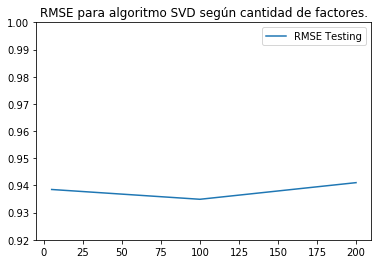

In [9]:
#Graficamos utilizando Matplotlib, los promedio RMSE del conjunto de testing considerando 5 factores en SVD
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(factors, rmse_test_means, label='RMSE Testing')
plt.ylim((0.92, 1.0))
plt.legend(loc="best")
plt.title("RMSE para algoritmo SVD según cantidad de factores.")
plt.show()

Para encontrar el mejor estimador usando SVD con 500 factores, se utilizara GrdSearch.
Se imprime el mejor RMSE.
Se utiliza 'fefit' para obtener el mejor estimador ya ajustado como resultado

Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


In [10]:
from surprise.model_selection import GridSearchCV #Cargamos el GridSearch CV a partir del model_selection del modulo surprise

data = Dataset.load_builtin('ml-100k') #cargamos los 100 mil revius

param_grid = {'n_factors': [1,25,502],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], #Cargamos los parametros que queremos recorrer con GrindSearch para seleccionar los mejores parametros
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, refit=True) #Utilizamos el algoritmo de SVD, recorremos los parametros asignados tomando RMSE Y MAE

gs.fit(data) #Itera cruzando todos los parametros hasta encontrar los mejores

In [11]:
print(gs.best_params['rmse']) #Imprimos por pantalla el mejor parametro de RMSE

{'n_factors': 1, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [12]:
print(gs.best_score['rmse']) #Imprimos por pantalla el mejor score de RMSE

0.9616954813594581


__¿Como obtener una prediccion para el usuario 321 para la película Titanic?__

In [14]:
#Levantar u.item y buscar titanic
import pandas as pd

colum_names = ['movie_id', "movie_title", "release_date", "video_release_date" ,"IMDb_URL", 'Action', "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "unknown"]

peliculas = pd.read_csv('C:\\Users\\soled\\Desktop\\Acamica\\Codigo\\Clase Acamica\\Entregas\\entrega6_Sistema_de_Recomendacion\\ml-100k\\u.item',
                        header = None,
                        names = colum_names,
                        encoding = 'ISO-8859-1', 
                        sep = '|')
peliculas.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#Busco cual es titanic en la tabla
peliculas[peliculas.movie_title.str.startswith('Titanic')]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
312,313,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
algo.predict('321', '313')

Prediction(uid='321', iid='313', r_ui=None, est=3.748563693975022, details={'was_impossible': False})

__Para desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas), haremos lo siguiente> .__

In [17]:
#Importamos la libreria y cargamos y levantamos el archivo
import pandas as pd

colum_names2 = ['user_id', 'item_id', 'rating', 'timestamp']

ratings = pd.read_csv('C:\\Users\\soled\\Desktop\\Acamica\\Codigo\\Clase Acamica\\Entregas\\entrega6_Sistema_de_Recomendacion\\ml-100k\\u.data',header = None,names = colum_names2,sep='\t')

In [18]:
colum_names = ['movie_id', "movie_title", "release_date", "video_release_date" ,"IMDb_URL", 'Action', "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "unknown"]

peliculas = pd.read_csv('C:\\Users\\soled\\Desktop\\Acamica\\Codigo\\Clase Acamica\\Entregas\\entrega6_Sistema_de_Recomendacion\\ml-100k\\u.item',
                        header = None,
                        names = colum_names,
                        encoding = 'ISO-8859-1', 
                        sep = '|')

In [19]:
def predicciondisponible(user):
    peliculas_vistas = ratings[ratings.user_id == user].item_id.tolist()
    peliculas_no_vistas = pd.DataFrame({'uid': user,
                                   'iid': peliculas[peliculas.index.isin(peliculas_vistas)==False].index})
    prediccion_rating = []
    for i in range(peliculas_no_vistas.shape[0]):
        rating = gs.predict(str(user), str(peliculas_no_vistas.iid[i]))
        prediccion_rating.append(rating.est)
    peliculas_no_vistas['prediccion_rating'] = prediccion_rating
    mejor_pelicula = peliculas_no_vistas[peliculas_no_vistas.prediccion_rating == peliculas_no_vistas.prediccion_rating.max()].iid
    return peliculas[peliculas.index.isin(mejor_pelicula)].movie_title
predicciondisponible(18)

114    Haunted World of Edward D. Wood Jr., The (1995)
Name: movie_title, dtype: object